# Machine Learning - Speed Bump Detection


## 1.Read dataset and save it into a pandas DataFrame

In [1]:
# Packages / libraries
import pandas as pd
import numpy as np
import os #provides functions for interacting with the operating system
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

df_sampled_two_sec = pd.read_csv("Default sensors values and two seconds sampling window.csv", index_col=0)
df_sampled_two_sec_sampled = pd.read_csv("Default sensors values and two seconds sampling window SAMPLED.csv", index_col=0)
df_sampled_three_sec = pd.read_csv("Default sensors values and three seconds sampling window.csv", index_col=0)
df_sampled_three_sec_sampled = pd.read_csv("Default sensors values and three seconds sampling window SAMPLED.csv", index_col=0)
df_sampled_four_sec = pd.read_csv("Default sensors values and four seconds sampling window.csv", index_col=0)
df_sampled_four_sec_sampled = pd.read_csv("Default sensors values and four seconds sampling window SAMPLED.csv", index_col=0)
df_sampled_location = pd.read_csv("Default sensors values and sampling by location.csv", index_col=0)

df_sampled_two_sec.name = 'df_sampled_two_sec'
df_sampled_two_sec_sampled.name = 'df_sampled_two_sec_sampled'
df_sampled_three_sec.name = 'df_sampled_three_sec'
df_sampled_three_sec_sampled.name = 'df_sampled_three_sec_sampled'
df_sampled_four_sec.name = 'df_sampled_four_sec'
df_sampled_four_sec_sampled.name = 'df_sampled_four_sec_sampled'
df_sampled_location.name = 'df_sampled_location'


## 2.Value Counts for the target class "Road_Anomaly_type"

In [2]:
datasets = [df_sampled_two_sec, df_sampled_two_sec_sampled, df_sampled_three_sec, df_sampled_three_sec_sampled
            , df_sampled_four_sec, df_sampled_four_sec_sampled, df_sampled_location]
for df in datasets:
    print(df.shape)
    print('Dataset: ' + df.name)
    print(df['Road_Anomaly_type'].value_counts(), end='\n\n')

(1079, 49)
Dataset: df_sampled_two_sec
0    984
1     95
Name: Road_Anomaly_type, dtype: int64

(607, 49)
Dataset: df_sampled_two_sec_sampled
0    512
1     95
Name: Road_Anomaly_type, dtype: int64

(719, 49)
Dataset: df_sampled_three_sec
0    624
1     95
Name: Road_Anomaly_type, dtype: int64

(527, 49)
Dataset: df_sampled_three_sec_sampled
0    432
1     95
Name: Road_Anomaly_type, dtype: int64

(540, 49)
Dataset: df_sampled_four_sec
0    445
1     95
Name: Road_Anomaly_type, dtype: int64

(446, 49)
Dataset: df_sampled_four_sec_sampled
0    351
1     95
Name: Road_Anomaly_type, dtype: int64

(261, 43)
Dataset: df_sampled_location
0    177
1     84
Name: Road_Anomaly_type, dtype: int64



In [3]:
Datsets_selection = [df_sampled_two_sec, df_sampled_two_sec_sampled, df_sampled_three_sec, df_sampled_four_sec]

## 3.Features selection

### 3.1  Tree-based estimators

In [4]:
from IPython.display import display

fi_df_1 = []
fi_df_2 = []
fi_df_3 = []
fi_df_4 = []

for df in Datsets_selection:
    #Split the data into X (Features) and y (Target class)
    X = df.drop('Road_Anomaly_type', axis = 1).values
    y = df['Road_Anomaly_type']

    y = y.astype(int)
    
    print(df.name)

    dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
    dt.fit(X,y)
    
    fi_col = []
    fi = []

    #Calculate feature importance
    for i,column in enumerate(df.drop('Road_Anomaly_type', axis = 1)):
        fi_col.append(column)
        fi.append(dt.feature_importances_[i])

    #Group the features into a dataframe 
    fi_col
    fi

    fi_df = zip(fi_col, fi)
    fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
    fi_df

    fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
    
    #Keep track of the features importance for each dataset
    if (df.name == 'df_sampled_two_sec'):
        fi_df_1 = fi_df
    elif (df.name == 'df_sampled_two_sec_sampled'):
        fi_df_2 = fi_df
    elif (df.name == 'df_sampled_three_sec'):
        fi_df_3 = fi_df
    elif (df.name == 'df_sampled_four_sec'):
        fi_df_4 = fi_df
        
    display(fi_df)
    print("\n")

df_sampled_two_sec


,index,Feature,Feature Importance
0,13,ACC_Y_DR,0.299585
1,22,GYRO_X_var,0.114392
2,11,ACC_Y_std,0.079166
3,21,GYRO_X_mean,0.042180
4,8,ACC_Y_var,0.038016
5,2,ACC_X_skew,0.035493
6,19,ACC_Z_max,0.034352
7,36,GYRO_Z_var,0.032937
8,7,ACC_Y_mean,0.028788
9,17,ACC_Z_kurtosis,0.024635




df_sampled_two_sec_sampled


,index,Feature,Feature Importance
0,13,ACC_Y_DR,0.292726
1,22,GYRO_X_var,0.088474
2,11,ACC_Y_std,0.069518
3,19,ACC_Z_max,0.062086
4,38,GYRO_Z_kurtosis,0.054668
5,21,GYRO_X_mean,0.054060
6,46,Accuracy,0.050424
7,36,GYRO_Z_var,0.044674
8,23,GYRO_X_skew,0.033399
9,42,Lat,0.030296




df_sampled_three_sec


,index,Feature,Feature Importance
0,13,ACC_Y_DR,0.338106
1,27,GYRO_X_DR,0.128096
2,19,ACC_Z_max,0.053264
3,34,GYRO_Y_DR,0.051688
4,36,GYRO_Z_var,0.044679
5,42,Lat,0.041464
6,11,ACC_Y_std,0.040622
7,38,GYRO_Z_kurtosis,0.039816
8,35,GYRO_Z_mean,0.028421
9,37,GYRO_Z_skew,0.024738




df_sampled_four_sec


,index,Feature,Feature Importance
0,13,ACC_Y_DR,0.311597
1,19,ACC_Z_max,0.109838
2,22,GYRO_X_var,0.057909
3,36,GYRO_Z_var,0.049309
4,45,Speed,0.046169
5,7,ACC_Y_mean,0.039863
6,17,ACC_Z_kurtosis,0.035720
7,2,ACC_X_skew,0.032114
8,46,Accuracy,0.026745
9,43,Lon,0.025860


### 4.1.1.Creating columns to keep

In [5]:
#df_sampled_two_sec
#We stopped at 0.03 as given that the latitude has a feature importance value of 0.024 we assume that all features with importance less than 0.03 are important by chance.

# Remove all columns with importance less than 0.3
attributes_subset_1 = fi_df_1['Feature'][0:1]  
#Features: ACC_Y_DR.

# Remove all columns with importance less than 0.1
attributes_subset_2 = fi_df_1['Feature'][0:2]  
#Features: ACC_Y_DR, GYRO_X_var.

# Remove all columns with importance less than 0.07
attributes_subset_3 = fi_df_1['Feature'][0:3]  
#Features: ACC_Y_DR, GYRO_X_var, ACC_Y_std.

# Remove all columns with importance less than 0.03
attributes_subset_4 = fi_df_1['Feature'][0:8]  
#Features: ACC_Y_DR, GYRO_X_var, ACC_Y_std, GYRO_X_mean, ACC_Y_var, ACC_X_skew, ACC_Z_max, ACC_Y_mean.


#df_sampled_two_sec_sampled
#We stopped at 0.054 as given that the Accuracy has a feature importance value of 0.05 we assume that all features with importance less than 0.05 are important by chance.

# Remove all columns with importance less than 0.29
#Features: ACC_Y_DR. (attributes_subset_1)

# Remove all columns with importance less than 0.08
#Features: ACC_Y_DR, GYRO_X_var. (attributes_subset_2)

# Remove all columns with importance less than 0.054
attributes_subset_5 = fi_df_2['Feature'][0:6]  
#Features: ACC_Y_DR, GYRO_X_var, ACC_Y_std, ACC_Z_max, GYRO_Z_kurtosis, GYRO_X_mean


#df_sampled_three_sec
#We stopped at 0.044 as given that the Latitude has a feature importance value of 0.041 we assume that all features with importance less than 0.041 are important by chance.

# Remove all columns with importance less than 0.3
#Features: ACC_Y_DR. (attributes_subset_1)

# Remove all columns with importance less than 0.1
attributes_subset_6 = fi_df_3['Feature'][0:2] 
#Features: ACC_Y_DR, GYRO_X_DR.

# Remove all columns with importance less than 0.044
attributes_subset_7 = fi_df_3['Feature'][0:5] 
#Features: ACC_Y_DR, GYRO_X_DR, ACC_Z_max, GYRO_Y_DR, GYRO_Z_var.


#df_sampled_four_sec
#We stopped at 0.049 as given that the speed has a feature importance value of 0.046 we assume that all features with importance less than 0.046 are important by chance.

# Remove all columns with importance less than 0.3
#Features: ACC_Y_DR. (attributes_subset_1)

# Remove all columns with importance less than 0.01
attributes_subset_8 = fi_df_4['Feature'][0:2]
#Features: ACC_Y_DR, ACC_Z_max.

# Remove all columns with importance less than 0.049
attributes_subset_9 = fi_df_4['Feature'][0:4]
#Features: ACC_Y_DR, ACC_Z_max, GYRO_X_var, GYRO_Z_var


### 3.2  Information gain - mutual information In Classification

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
fmi_df_1 = []
fmi_df_2 = []
fmi_df_3 = []
fmi_df_4 = []
for df in Datsets_selection:
    
    #Split the data into X (Features) and y (Target class)
    X = df.drop('Road_Anomaly_type', axis = 1).values
    y = df['Road_Anomaly_type']
    y = y.astype(int)
    
    #Train test split to avoid overfitting
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)
    
    # determine the mutual information
    mutual_info = mutual_info_classif(X_train, y_train)

    #Group the features into a dataframe 
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = df.drop('Road_Anomaly_type', axis = 1).columns
    mutual_info.sort_values(ascending=False)
    fmi_df = pd.DataFrame(mutual_info, columns = ['Feature Importance'])
    fmi_df = fmi_df.sort_values('Feature Importance', ascending = False).reset_index()
    
    #Keep track of the features importance for each dataset
    if (df.name == 'df_sampled_two_sec'):
        fmi_df_1 = fmi_df
    elif (df.name == 'df_sampled_two_sec_sampled'):
        fmi_df_2 = fmi_df
    elif (df.name == 'df_sampled_three_sec'):
        fmi_df_3 = fmi_df
    elif (df.name == 'df_sampled_four_sec'):
        fmi_df_4 = fmi_df
        
    print(df.name)    
    display(fmi_df)
    print("\n")
    

df_sampled_two_sec


,index,Feature Importance
0,ACC_Y_DR,0.099876
1,ACC_Y_std,0.089405
2,ACC_Y_var,0.088940
3,ACC_Z_DR,0.062144
4,GYRO_X_std,0.059342
5,GYRO_X_var,0.059236
6,ACC_Y_max,0.057848
7,GYRO_X_DR,0.055983
8,GYRO_X_max,0.045995
9,GYRO_X_mean,0.045413




df_sampled_two_sec_sampled


,index,Feature Importance
0,ACC_Y_DR,0.163027
1,ACC_Y_var,0.147575
2,ACC_Y_std,0.147144
3,GYRO_X_std,0.122528
4,GYRO_X_var,0.120836
5,ACC_Y_max,0.119170
6,GYRO_X_DR,0.097083
7,GYRO_X_mean,0.086731
8,ACC_Z_std,0.077791
9,ACC_Z_var,0.076162




df_sampled_three_sec


,index,Feature Importance
0,ACC_Y_DR,0.137463
1,ACC_Y_std,0.136573
2,ACC_Y_var,0.134948
3,GYRO_X_DR,0.130138
4,GYRO_X_std,0.119417
5,GYRO_X_var,0.117278
6,ACC_Y_max,0.091979
7,ACC_Z_var,0.088511
8,ACC_Z_std,0.088461
9,GYRO_X_max,0.077505




df_sampled_four_sec


,index,Feature Importance
0,ACC_Y_DR,0.150911
1,GYRO_X_std,0.133152
2,GYRO_X_var,0.132200
3,ACC_Y_var,0.129169
4,ACC_Y_std,0.127588
5,GYRO_X_DR,0.108525
6,ACC_Y_max,0.107383
7,ACC_Z_std,0.104594
8,ACC_Z_var,0.103805
9,GYRO_X_max,0.095931


### 3.2.1. Creating columns to keep

In [7]:
#df_sampled_two_sec
# Remove all columns with mutual info less than 0.08
attributes_subset_10 = fmi_df_1['index'][0:3]
#Features: ACC_Y_DR, ACC_Y_std, ACC_Y_var.

# Remove all columns with mutual info less than 0.05
attributes_subset_11 = fmi_df_1['index'][0:8]
#Features: ACC_Y_DR, ACC_Y_std, ACC_Y_var, ACC_Z_DR, GYRO_X_std, GYRO_X_var, ACC_Y_max, GYRO_X_DR.

# Remove all columns with mutual info less than 0.04
attributes_subset_12 = fmi_df_1['index'][0:12]
#Features: ACC_Y_DR, ACC_Y_std, ACC_Y_var, ACC_Z_DR, GYRO_X_std, GYRO_X_var, ACC_Y_max, GYRO_X_DR, GYRO_X_max, GYRO_X_mean, ACC_Z_std, ACC_Z_var. 

# Remove all columns with mutual info less than 0.01
attributes_subset_13 = fmi_df_1['index'][0:20]


#df_sampled_two_sec_sampled
# Remove all columns with mutual info less than 0.14
#Features: ACC_Y_DR, ACC_Y_std, ACC_Y_var. (columns_to_keep_10)

# Remove all columns with mutual info less than 0.11
attributes_subset_14 = fmi_df_2['index'][0:6]
#Features: ACC_Y_DR, ACC_Y_std, ACC_Y_var, GYRO_X_std, GYRO_X_var, ACC_Y_max. 

# Remove all columns with mutual info less than 0.06
#(columns_to_keep_12)

# Remove all columns with mutual info less than 0.01
attributes_subset_15 = fmi_df_2['index'][0:25]


#df_sampled_three_sec
# Remove all columns with mutual info less than 0.13
attributes_subset_16 = fmi_df_3['index'][0:4]
#Features: ACC_Y_DR, ACC_Y_std, ACC_Y_var, GYRO_X_DR

# Remove all columns with mutual info less than 0.11
attributes_subset_17 = fmi_df_3['index'][0:6]
#Features: ACC_Y_DR, ACC_Y_std, ACC_Y_var, GYRO_X_DR, GYRO_X_std, GYRO_X_var.

# Remove all columns with mutual info less than 0.07
attributes_subset_18 = fmi_df_3['index'][0:11]
#Features: ACC_Y_DR, ACC_Y_std, ACC_Y_var, GYRO_X_DR, GYRO_X_std, GYRO_X_var, ACC_Y_max, ACC_Z_var, ACC_Z_std, GYRO_X_max, ACC_Z_DR.

# Remove all columns with mutual info less than 0.01
attributes_subset_19 = fmi_df_3['index'][0:29]


#df_sampled_four_sec
# Remove all columns with mutual info less than 0.12
attributes_subset_20 = fmi_df_4['index'][0:5]
# Remove all columns with mutual info less than 0.09
attributes_subset_21 = fmi_df_4['index'][0:10]
# Remove all columns with mutual info less than 0.04
attributes_subset_22 = fmi_df_4['index'][0:15]






In [8]:
df_sampled_two_sec_subsets = [attributes_subset_1, attributes_subset_2, attributes_subset_3,attributes_subset_4, attributes_subset_10
                              , attributes_subset_11, attributes_subset_12, attributes_subset_13]

df_sampled_two_sec_sampled_subsets = [attributes_subset_1, attributes_subset_2, attributes_subset_5,attributes_subset_10
                                      , attributes_subset_12, attributes_subset_14, attributes_subset_15]

df_sampled_three_sec_subsets = [attributes_subset_1, attributes_subset_6, attributes_subset_7, attributes_subset_16, attributes_subset_17
                                      , attributes_subset_18, attributes_subset_19]

df_sampled_four_sec_subsets = [attributes_subset_1, attributes_subset_8, attributes_subset_9,attributes_subset_20, attributes_subset_21
                              , attributes_subset_22]
                                      


## 4.Classifiers evaluation

In [9]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes
                    , vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
train_test_percentages = [[0.55,0.45], [0.65,0.35], [0.7,0.3], [0.75,0.25], [0.8,0.2], [0.85,0.15], [0.9,0.1]]

## 4.1.Logistic regression

## 4.1.1.df_sampled_two_sec

## 4.1.1.1.Before Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Feature: ACC_Y_DR
1           Feature: ACC_Y_std
2           Feature: ACC_Y_var
3            Feature: ACC_Z_DR
4          Feature: GYRO_X_std
5          Feature: GYRO_X_var
6           Feature: ACC_Y_max
7           Feature: GYRO_X_DR
8          Feature: GYRO_X_max
9         Feature: GYRO_X_mean
10          Feature: ACC_Z_std
11          Feature: ACC_Z_var
12        Feature: GYRO_X_skew
13          Feature: ACC_Z_max
14        Feature: GYRO_Z_mean
15          Feature: GYRO_Z_DR
16         Feature: GYRO_Z_max
17        Feature: GYRO_Y_skew
18    Feature: GYRO_X_kurtosis
19        Feature: GYRO_Y_mean
Name: index, dtype: object
1
6


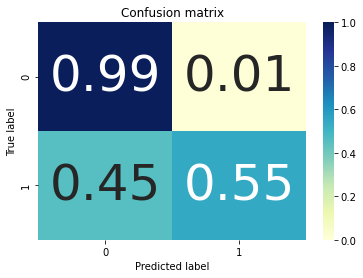

In [11]:
for attribute_set in df_sampled_two_sec_subsets:
    
    
    X = df_sampled_two_sec[attribute_set].values
    y = df_sampled_two_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        log_reg = LogisticRegression(random_state=10, solver = 'liblinear')
        log_reg.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        y_pred = log_reg.predict(X_test)

        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
        
        
        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if(TPR[1] >= 0.54 and FPR[1]<0.011):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Feature: " +attribute_set )
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
            plt.show()
    
    

## 4.1.1.2.After Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: ACC_Y_std
2     Attribute set: ACC_Y_var
3      Attribute set: ACC_Z_DR
4    Attribute set: GYRO_X_std
5    Attribute set: GYRO_X_var
6     Attribute set: ACC_Y_max
7     Attribute set: GYRO_X_DR
Name: index, dtype: object
C parameter: 0.04832930238571752

1
7


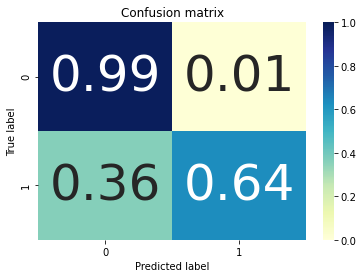

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: ACC_Y_std
2     Attribute set: ACC_Y_var
3      Attribute set: ACC_Z_DR
4    Attribute set: GYRO_X_std
5    Attribute set: GYRO_X_var
6     Attribute set: ACC_Y_max
7     Attribute set: GYRO_X_DR
Name: index, dtype: object
C parameter: 0.1623776739188721

1
7


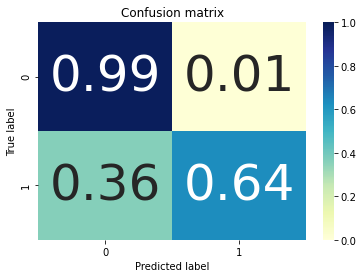

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0        Attribute set: ACC_Y_DR
1       Attribute set: ACC_Y_std
2       Attribute set: ACC_Y_var
3        Attribute set: ACC_Z_DR
4      Attribute set: GYRO_X_std
5      Attribute set: GYRO_X_var
6       Attribute set: ACC_Y_max
7       Attribute set: GYRO_X_DR
8      Attribute set: GYRO_X_max
9     Attribute set: GYRO_X_mean
10      Attribute set: ACC_Z_std
11      Attribute set: ACC_Z_var
Name: index, dtype: object
C parameter: 0.04832930238571752

1
7


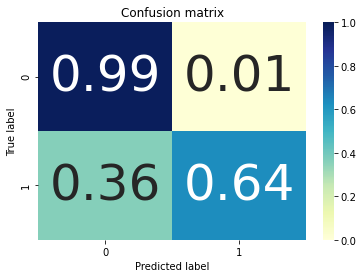

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0        Attribute set: ACC_Y_DR
1       Attribute set: ACC_Y_std
2       Attribute set: ACC_Y_var
3        Attribute set: ACC_Z_DR
4      Attribute set: GYRO_X_std
5      Attribute set: GYRO_X_var
6       Attribute set: ACC_Y_max
7       Attribute set: GYRO_X_DR
8      Attribute set: GYRO_X_max
9     Attribute set: GYRO_X_mean
10      Attribute set: ACC_Z_std
11      Attribute set: ACC_Z_var
Name: index, dtype: object
C parameter: 0.1623776739188721

1
7


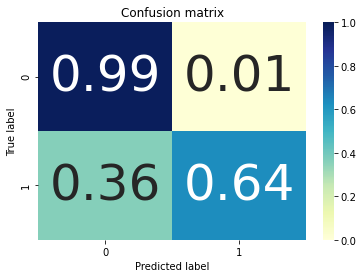

In [12]:
for attribute_set in df_sampled_two_sec_subsets:
    
    X = df_sampled_two_sec[attribute_set].values
    y = df_sampled_two_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        C_List = np.geomspace(1e-5, 1e5, num=20)

        for c in C_List:
            
            log_reg2 = LogisticRegression(random_state=10, solver = 'liblinear', C=c)
            log_reg2.fit(X_train, y_train)
            y_pred = log_reg2.predict(X_test)
            
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            if(TPR[1] > 0.63 and FPR[1]<0.011):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("C parameter: {}".format(c))
                print("")
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
                plt.show()

            
    
    

## 4.1.2.df_sampled_two_sec_sampled

## 4.1.2.1.Before Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.65/0.35
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

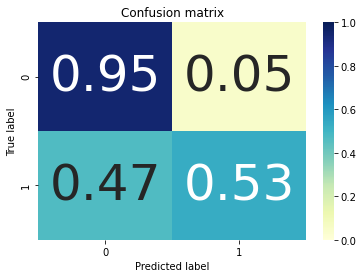

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

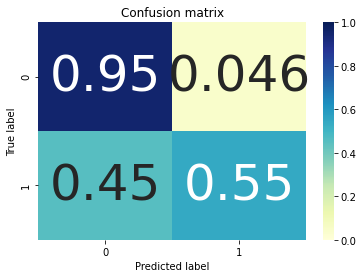

In [13]:
for attribute_set in df_sampled_two_sec_sampled_subsets:
    
    X = df_sampled_two_sec_sampled[attribute_set].values
    y = df_sampled_two_sec_sampled['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        log_reg = LogisticRegression(random_state=10, solver = 'liblinear')
        log_reg.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        y_pred = log_reg.predict(X_test)

        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
        
        
        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if(TPR[1] > 0.5 and FPR[1]<0.05):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
            plt.show()
    

## 4.1.2.2.After Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.55/0.45
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

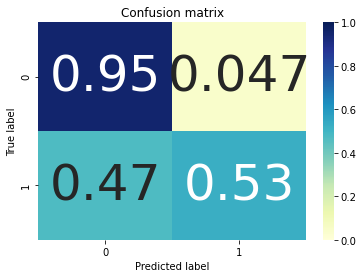

Dataset: df_sampled_four_sec
Train/Test Split: 0.65/0.35
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

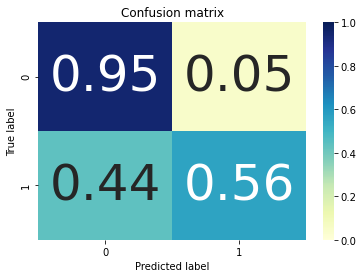

Dataset: df_sampled_four_sec
Train/Test Split: 0.65/0.35
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

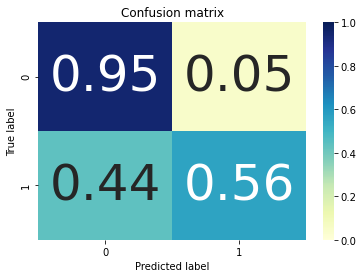

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

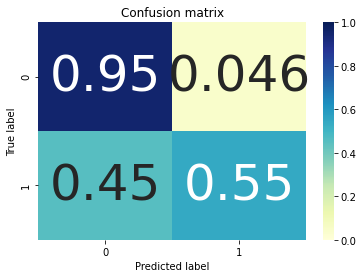

In [14]:
for attribute_set in df_sampled_two_sec_sampled_subsets:
    
    X = df_sampled_two_sec_sampled[attribute_set].values
    y = df_sampled_two_sec_sampled['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        C_List = np.geomspace(1e-5, 1e5, num=20)

        for c in C_List:
            
            log_reg2 = LogisticRegression(random_state=10, solver = 'liblinear', C=c)
            log_reg2.fit(X_train, y_train)
            y_pred = log_reg2.predict(X_test)
            
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            if(TPR[1] > 0.5 and FPR[1]<0.05):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("C parameter: {}".format(c))
                print("")
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
                plt.show()

            
    
    

## 4.1.3.df_sampled_three_sec

## 4.1.3.1.Before Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0       Attribute set: ACC_Y_DR
1      Attribute set: ACC_Y_std
2      Attribute set: ACC_Y_var
3      Attribute set: GYRO_X_DR
4     Attribute set: GYRO_X_std
5     Attribute set: GYRO_X_var
6      Attribute set: ACC_Y_max
7      Attribute set: ACC_Z_var
8      Attribute set: ACC_Z_std
9     Attribute set: GYRO_X_max
10      Attribute set: ACC_Z_DR
Name: index, dtype: object
0
9


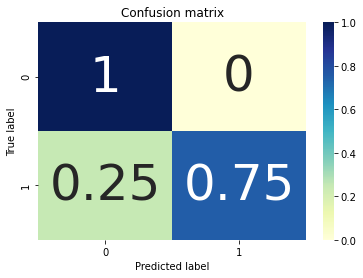

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

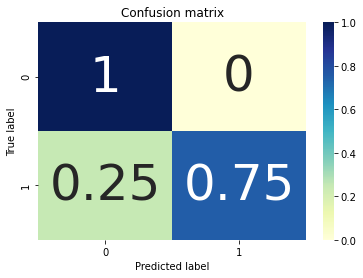

In [15]:
for attribute_set in df_sampled_three_sec_subsets:
    
    X = df_sampled_three_sec[attribute_set].values
    y = df_sampled_three_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        log_reg = LogisticRegression(random_state=10, solver = 'liblinear')
        log_reg.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        y_pred = log_reg.predict(X_test)

        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
        
        
        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if(TPR[1] >= 0.7 and FPR[1]<0.001):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
            plt.show()
    

## 4.1.3.2.After Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0       Attribute set: ACC_Y_DR
1      Attribute set: ACC_Y_std
2      Attribute set: ACC_Y_var
3      Attribute set: GYRO_X_DR
4     Attribute set: GYRO_X_std
5     Attribute set: GYRO_X_var
6      Attribute set: ACC_Y_max
7      Attribute set: ACC_Z_var
8      Attribute set: ACC_Z_std
9     Attribute set: GYRO_X_max
10      Attribute set: ACC_Z_DR
Name: index, dtype: object
C parameter: 1.8329807108324339

0
10


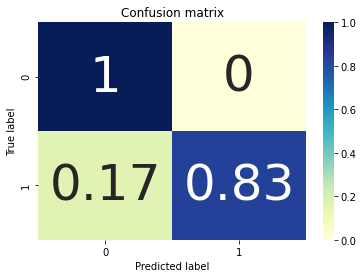

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

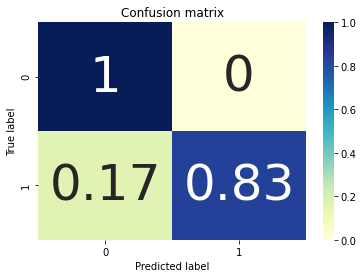

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

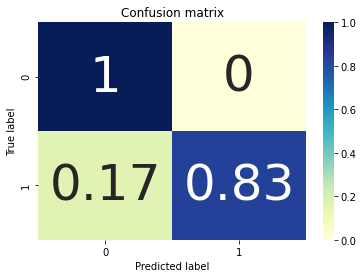

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

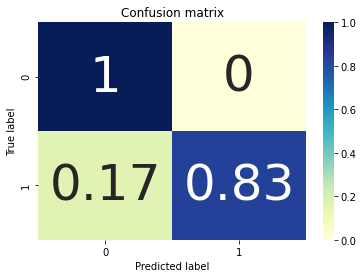

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

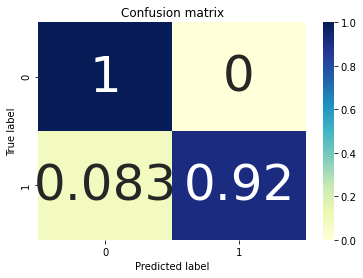

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

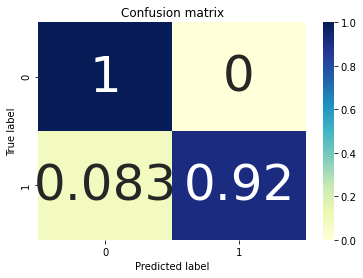

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

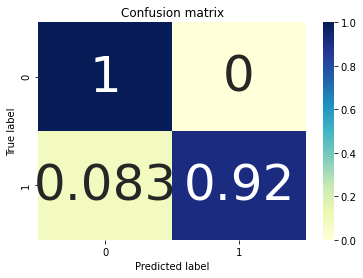

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

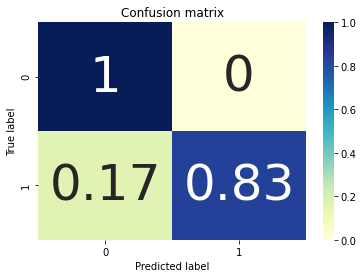

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

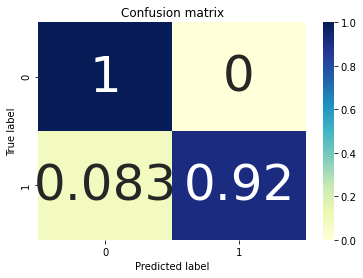

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

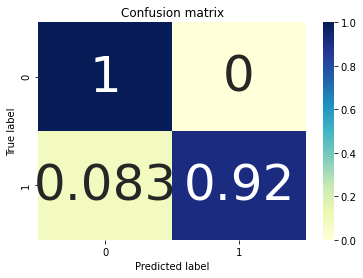

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

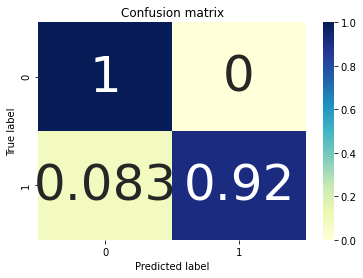

In [16]:
for attribute_set in df_sampled_three_sec_subsets:
    
    X = df_sampled_three_sec[attribute_set].values
    y = df_sampled_three_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        C_List = np.geomspace(1e-5, 1e5, num=20)

        for c in C_List:
            
            log_reg2 = LogisticRegression(random_state=10, solver = 'liblinear', C=c)
            log_reg2.fit(X_train, y_train)
            y_pred = log_reg2.predict(X_test)
            
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            if(TPR[1] >= 0.8 and FPR[1]<=0.001):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("C parameter: {}".format(c))
                print("")
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
                plt.show()

            
    
    

## 4.1.4.df_sampled_four_sec

## 4.1.4.1.Before Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.7/0.3
0            Attribute set: ACC_Y_DR
1          Attribute set: GYRO_X_std
2          Attribute set: GYRO_X_var
3           Attribute set: ACC_Y_var
4           Attribute set: ACC_Y_std
5           Attribute set: GYRO_X_DR
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_std
8           Attribute set: ACC_Z_var
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12          Attribute set: GYRO_Z_DR
13    Attribute set: GYRO_X_kurtosis
14         Attribute set: ACC_Y_skew
Name: index, dtype: object
4
13


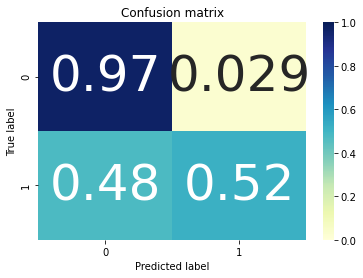

In [17]:
for attribute_set in df_sampled_four_sec_subsets:
    
    X = df_sampled_four_sec[attribute_set].values
    y = df_sampled_four_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        log_reg = LogisticRegression(random_state=10, solver = 'liblinear')
        log_reg.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        y_pred = log_reg.predict(X_test)

        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
        
        
        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if(TPR[1] > 0.5 and FPR[1]<0.03):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
            plt.show()
    

## 4.1.4.2.After Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.7/0.3
0            Attribute set: ACC_Y_DR
1          Attribute set: GYRO_X_std
2          Attribute set: GYRO_X_var
3           Attribute set: ACC_Y_var
4           Attribute set: ACC_Y_std
5           Attribute set: GYRO_X_DR
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_std
8           Attribute set: ACC_Z_var
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12          Attribute set: GYRO_Z_DR
13    Attribute set: GYRO_X_kurtosis
14         Attribute set: ACC_Y_skew
Name: index, dtype: object
C parameter: 1.8329807108324339

4
14


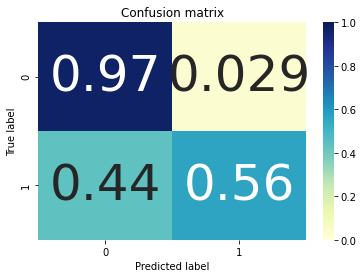

Dataset: df_sampled_four_sec
Train/Test Split: 0.7/0.3
0            Attribute set: ACC_Y_DR
1          Attribute set: GYRO_X_std
2          Attribute set: GYRO_X_var
3           Attribute set: ACC_Y_var
4           Attribute set: ACC_Y_std
5           Attribute set: GYRO_X_DR
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_std
8           Attribute set: ACC_Z_var
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12          Attribute set: GYRO_Z_DR
13    Attribute set: GYRO_X_kurtosis
14         Attribute set: ACC_Y_skew
Name: index, dtype: object
C parameter: 6.1584821106602545

4
14


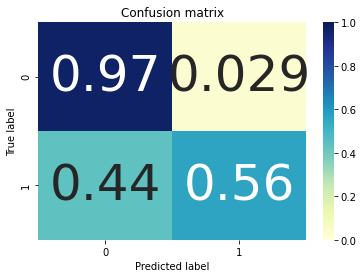

Dataset: df_sampled_four_sec
Train/Test Split: 0.85/0.15
0            Attribute set: ACC_Y_DR
1          Attribute set: GYRO_X_std
2          Attribute set: GYRO_X_var
3           Attribute set: ACC_Y_var
4           Attribute set: ACC_Y_std
5           Attribute set: GYRO_X_DR
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_std
8           Attribute set: ACC_Z_var
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12          Attribute set: GYRO_Z_DR
13    Attribute set: GYRO_X_kurtosis
14         Attribute set: ACC_Y_skew
Name: index, dtype: object
C parameter: 1.8329807108324339

2
7


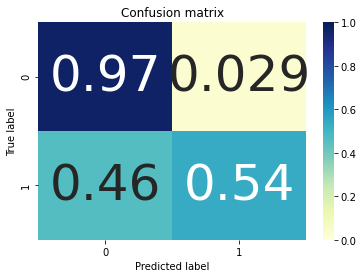

Dataset: df_sampled_four_sec
Train/Test Split: 0.85/0.15
0            Attribute set: ACC_Y_DR
1          Attribute set: GYRO_X_std
2          Attribute set: GYRO_X_var
3           Attribute set: ACC_Y_var
4           Attribute set: ACC_Y_std
5           Attribute set: GYRO_X_DR
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_std
8           Attribute set: ACC_Z_var
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12          Attribute set: GYRO_Z_DR
13    Attribute set: GYRO_X_kurtosis
14         Attribute set: ACC_Y_skew
Name: index, dtype: object
C parameter: 6.1584821106602545

2
7


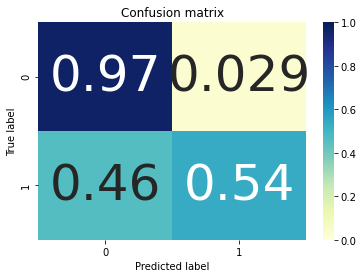

In [18]:
for attribute_set in df_sampled_four_sec_subsets:
    
    X = df_sampled_four_sec[attribute_set].values
    y = df_sampled_four_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        C_List = np.geomspace(1e-5, 1e5, num=20)

        for c in C_List:
            
            log_reg2 = LogisticRegression(random_state=10, solver = 'liblinear', C=c)
            log_reg2.fit(X_train, y_train)
            y_pred = log_reg2.predict(X_test)
            
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            if(TPR[1] > 0.5 and FPR[1]<0.03):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("C parameter: {}".format(c))
                print("")
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
                plt.show()

            
    
    

## 4.2.SVM

## 4.2.1.df_sampled_two_sec

## 4.2.1.1.Before Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3            Attribute set: ACC_Z_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: GYRO_X_DR
8          Attribute set: GYRO_X_max
9         Attribute set: GYRO_X_mean
10          Attribute set: ACC_Z_std
11          Attribute set: ACC_Z_var
12        Attribute set: GYRO_X_skew
13          Attribute set: ACC_Z_max
14        Attribute set: GYRO_Z_mean
15          Attribute set: GYRO_Z_DR
16         Attribute set: GYRO_Z_max
17        Attribute set: GYRO_Y_skew
18    Attribute set: GYRO_X_kurtosis
19        Attribute set: GYRO_Y_mean
Name: index, dtype: object
1
7


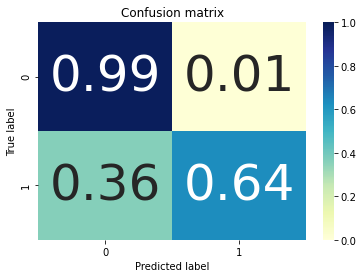

In [19]:
for attribute_set in df_sampled_two_sec_subsets:
    
    X = df_sampled_two_sec[attribute_set].values
    y = df_sampled_two_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        Classifier = svm.SVC(kernel='linear')
        Classifier.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        y_pred = Classifier.predict(X_test)
        
        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        if(TPR[1] > 0.63 and FPR[1] < 0.011):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
            plt.show()

## 4.2.1.2.After Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3            Attribute set: ACC_Z_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: GYRO_X_DR
8          Attribute set: GYRO_X_max
9         Attribute set: GYRO_X_mean
10          Attribute set: ACC_Z_std
11          Attribute set: ACC_Z_var
12        Attribute set: GYRO_X_skew
13          Attribute set: ACC_Z_max
14        Attribute set: GYRO_Z_mean
15          Attribute set: GYRO_Z_DR
16         Attribute set: GYRO_Z_max
17        Attribute set: GYRO_Y_skew
18    Attribute set: GYRO_X_kurtosis
19        Attribute set: GYRO_Y_mean
Name: index, dtype: object
C parameter: 0.42813323987193935

1
7


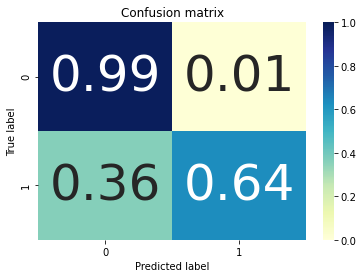

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3            Attribute set: ACC_Z_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: GYRO_X_DR
8          Attribute set: GYRO_X_max
9         Attribute set: GYRO_X_mean
10          Attribute set: ACC_Z_std
11          Attribute set: ACC_Z_var
12        Attribute set: GYRO_X_skew
13          Attribute set: ACC_Z_max
14        Attribute set: GYRO_Z_mean
15          Attribute set: GYRO_Z_DR
16         Attribute set: GYRO_Z_max
17        Attribute set: GYRO_Y_skew
18    Attribute set: GYRO_X_kurtosis
19        Attribute set: GYRO_Y_mean
Name: index, dtype: object
C parameter: 0.6158482110660264

1
7


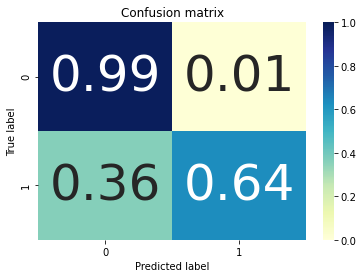

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3            Attribute set: ACC_Z_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: GYRO_X_DR
8          Attribute set: GYRO_X_max
9         Attribute set: GYRO_X_mean
10          Attribute set: ACC_Z_std
11          Attribute set: ACC_Z_var
12        Attribute set: GYRO_X_skew
13          Attribute set: ACC_Z_max
14        Attribute set: GYRO_Z_mean
15          Attribute set: GYRO_Z_DR
16         Attribute set: GYRO_Z_max
17        Attribute set: GYRO_Y_skew
18    Attribute set: GYRO_X_kurtosis
19        Attribute set: GYRO_Y_mean
Name: index, dtype: object
C parameter: 0.8858667904100825

1
7


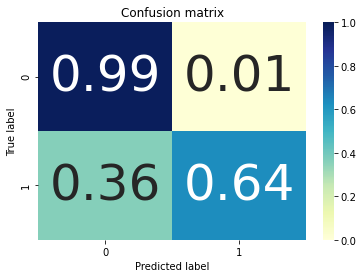

In [20]:
for attribute_set in df_sampled_two_sec_subsets:
    
    X = df_sampled_two_sec[attribute_set].values
    y = df_sampled_two_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        C_List_SVM = np.geomspace(0.1, 100, num=20)
        
        for c in C_List_SVM:
            
            Classifier = svm.SVC(kernel='linear', C=c)
            Classifier.fit(X_train, y_train)
        
            # predict - Predict class labels for samples in X
            y_pred = Classifier.predict(X_test)
            
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            if(TPR[1] > 0.63 and FPR[1] < 0.011):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("C parameter: {}".format(c))
                print("")
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
                plt.show()

## 4.2.2.df_sampled_two_sec_sampled

## 4.2.2.1.Before Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

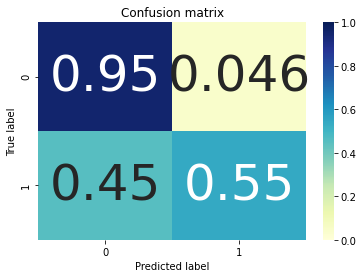

In [21]:
for attribute_set in df_sampled_two_sec_sampled_subsets:
    
    X = df_sampled_two_sec_sampled[attribute_set].values
    y = df_sampled_two_sec_sampled['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        Classifier = svm.SVC(kernel='linear')
        Classifier.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        y_pred = Classifier.predict(X_test)
        
        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        if(TPR[1] > 0.54 and FPR[1] < 0.05):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
            plt.show()

## 4.2.2.2.After Hyper Parameter Tuning


Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0        Attribute set: ACC_Y_DR
1       Attribute set: ACC_Y_std
2       Attribute set: ACC_Y_var
3        Attribute set: ACC_Z_DR
4      Attribute set: GYRO_X_std
5      Attribute set: GYRO_X_var
6       Attribute set: ACC_Y_max
7       Attribute set: GYRO_X_DR
8      Attribute set: GYRO_X_max
9     Attribute set: GYRO_X_mean
10      Attribute set: ACC_Z_std
11      Attribute set: ACC_Z_var
Name: index, dtype: object
C parameter: 1.8329807108324356

6
12


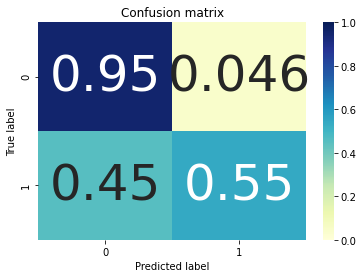

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0        Attribute set: ACC_Y_DR
1       Attribute set: ACC_Y_std
2       Attribute set: ACC_Y_var
3        Attribute set: ACC_Z_DR
4      Attribute set: GYRO_X_std
5      Attribute set: GYRO_X_var
6       Attribute set: ACC_Y_max
7       Attribute set: GYRO_X_DR
8      Attribute set: GYRO_X_max
9     Attribute set: GYRO_X_mean
10      Attribute set: ACC_Z_std
11      Attribute set: ACC_Z_var
Name: index, dtype: object
C parameter: 2.636650898730358

6
12


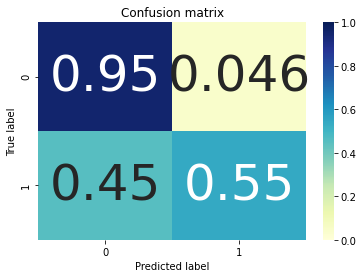

Dataset: df_sampled_four_sec
Train/Test Split: 0.55/0.45
0      Attribute set: ACC_Y_DR
1     Attribute set: ACC_Y_var
2     Attribute set: ACC_Y_std
3    Attribute set: GYRO_X_std
4    Attribute set: GYRO_X_var
5     Attribute set: ACC_Y_max
Name: index, dtype: object
C parameter: 100.0

11
21


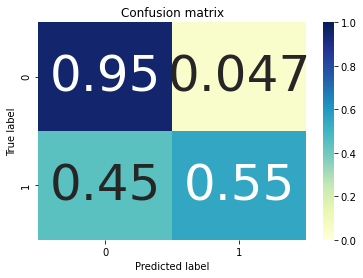

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

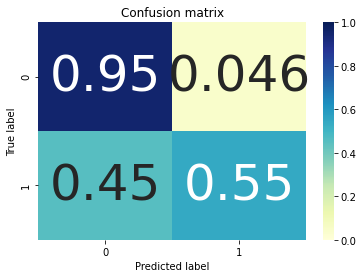

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

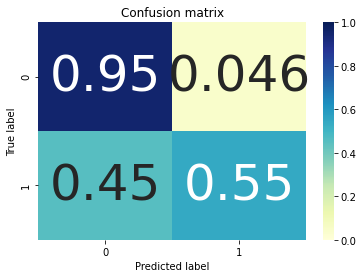

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

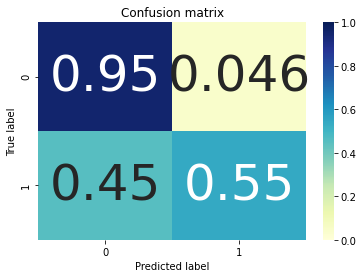

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

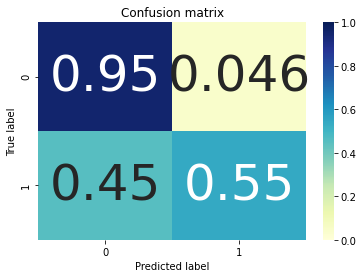

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

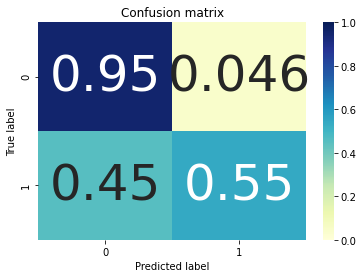

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

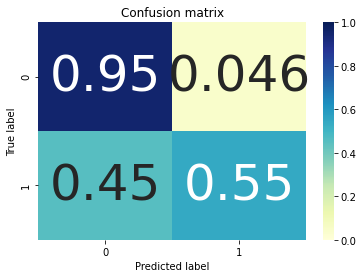

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

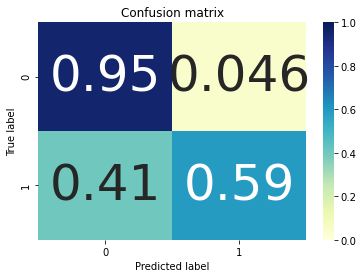

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

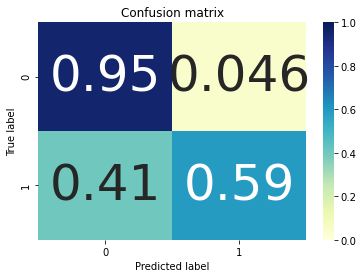

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

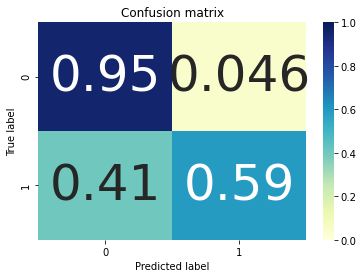

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

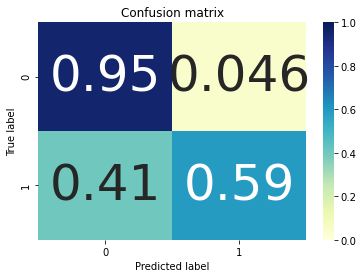

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

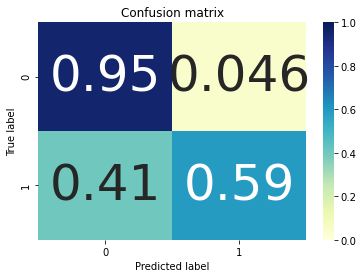

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

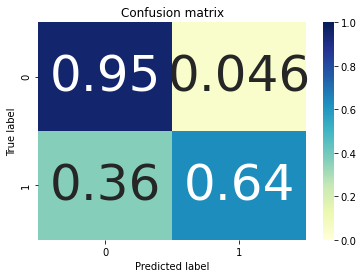

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

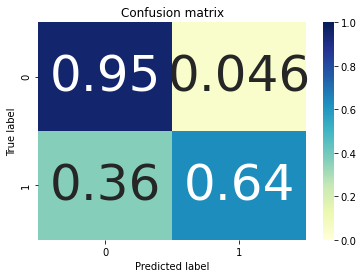

Dataset: df_sampled_four_sec
Train/Test Split: 0.75/0.25
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype

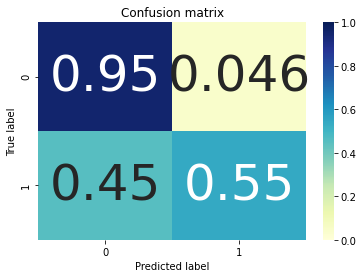

Dataset: df_sampled_four_sec
Train/Test Split: 0.8/0.2
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_var
2           Attribute set: ACC_Y_std
3          Attribute set: GYRO_X_std
4          Attribute set: GYRO_X_var
5           Attribute set: ACC_Y_max
6           Attribute set: GYRO_X_DR
7         Attribute set: GYRO_X_mean
8           Attribute set: ACC_Z_std
9           Attribute set: ACC_Z_var
10         Attribute set: GYRO_X_max
11           Attribute set: ACC_Z_DR
12        Attribute set: GYRO_X_skew
13         Attribute set: ACC_Z_skew
14          Attribute set: GYRO_Z_DR
15         Attribute set: GYRO_Z_std
16         Attribute set: GYRO_Z_var
17         Attribute set: ACC_X_skew
18     Attribute set: ACC_Y_kurtosis
19    Attribute set: GYRO_X_kurtosis
20     Attribute set: ACC_Z_kurtosis
21          Attribute set: ACC_Z_max
22        Attribute set: GYRO_Z_mean
23        Attribute set: GYRO_Y_skew
24         Attribute set: ACC_Z_mean
Name: index, dtype: 

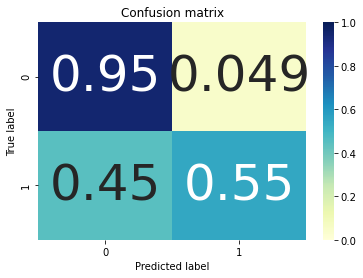

In [22]:
for attribute_set in df_sampled_two_sec_sampled_subsets:
    
    X = df_sampled_two_sec_sampled[attribute_set].values
    y = df_sampled_two_sec_sampled['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        C_List_SVM = np.geomspace(0.1, 100, num=20)

        for c in C_List_SVM:
            
            Classifier = svm.SVC(kernel='linear', C=c)
            Classifier.fit(X_train, y_train)
        
            # predict - Predict class labels for samples in X
            y_pred = Classifier.predict(X_test)
            
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            if(TPR[1] > 0.54 and FPR[1] < 0.05):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("C parameter: {}".format(c))
                print("")
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
                plt.show()

## 4.2.3.df_sampled_three_sec

## 4.2.3.1.Before Hyper Parameter Tuning

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
0
9


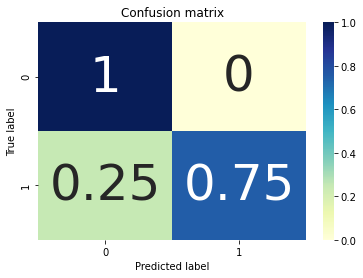

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0            Attribute set: ACC_Y_DR
1           Attribute set: ACC_Y_std
2           Attribute set: ACC_Y_var
3           Attribute set: GYRO_X_DR
4          Attribute set: GYRO_X_std
5          Attribute set: GYRO_X_var
6           Attribute set: ACC_Y_max
7           Attribute set: ACC_Z_var
8           Attribute set: ACC_Z_std
9          Attribute set: GYRO_X_max
10           Attribute set: ACC_Z_DR
11        Attribute set: GYRO_X_skew
12    Attribute set: GYRO_X_kurtosis
13        Attribute set: GYRO_X_mean
14          Attribute set: ACC_Z_max
15          Attribute set: ACC_X_std
16          Attribute set: ACC_X_var
17     Attribute set: ACC_Z_kurtosis
18     Attribute set: ACC_Y_kurtosis
19          Attribute set: ACC_X_max
20        Attribute set: GYRO_Z_mean
21         Attribute set: GYRO_Z_std
22         Attribute set: GYRO_Z_var
23           Attribute set: Accuracy
24         Attribute set: ACC_Z_mean
25         Attribute

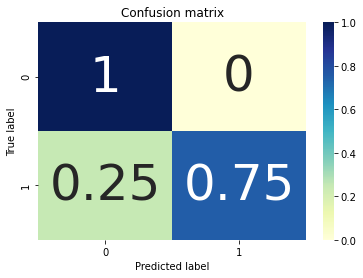

In [23]:
for attribute_set in df_sampled_three_sec_subsets:
    
    X = df_sampled_three_sec[attribute_set].values
    y = df_sampled_three_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        Classifier = svm.SVC(kernel='linear')
        Classifier.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        y_pred = Classifier.predict(X_test)
        
        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        if(TPR[1] > 0.74 and FPR[1] < 0.001):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
            plt.show()

## 4.2.3.2.After Hyper Parameter Tuning


Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 0.6158482110660264

0
9


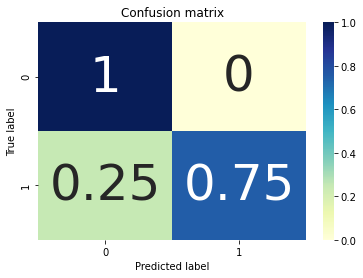

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 0.8858667904100825

0
9


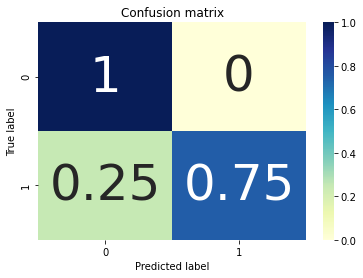

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 1.2742749857031335

0
9


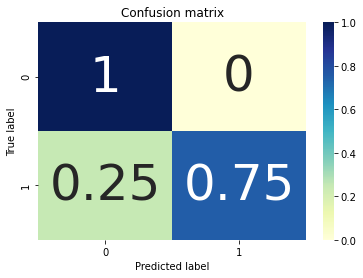

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 1.8329807108324356

0
9


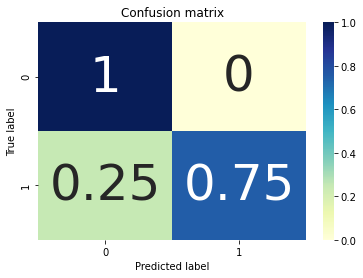

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 2.636650898730358

0
9


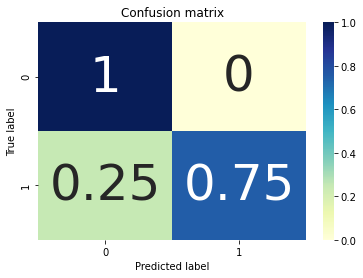

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 3.79269019073225

0
9


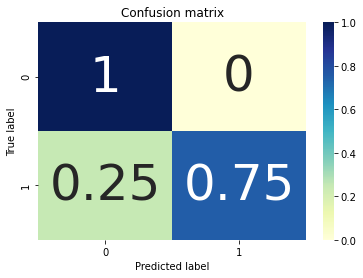

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 5.455594781168517

0
9


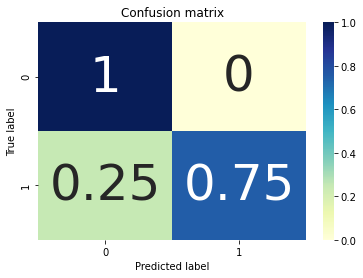

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 7.847599703514611

0
9


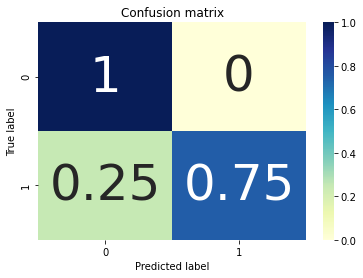

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 11.288378916846883

0
9


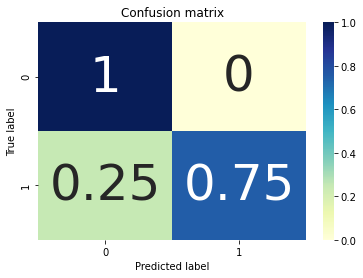

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 16.23776739188721

0
9


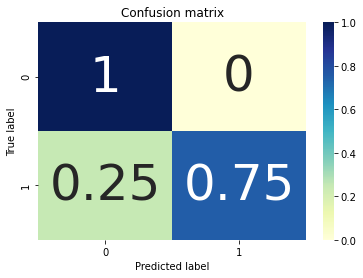

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 23.357214690901213

0
9


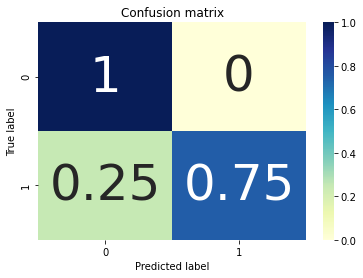

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 33.59818286283781

0
9


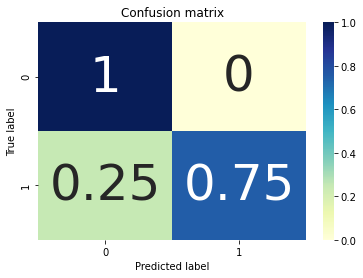

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 48.32930238571752

0
9


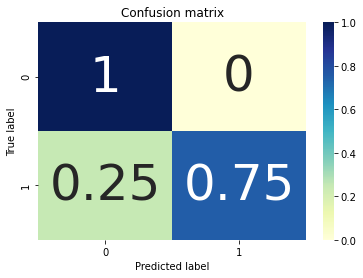

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 69.51927961775606

0
9


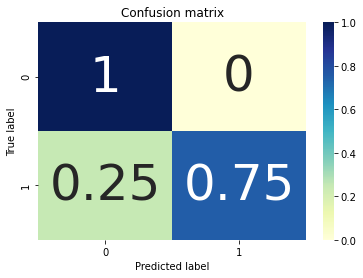

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0      Attribute set: ACC_Y_DR
1     Attribute set: GYRO_X_DR
2     Attribute set: ACC_Z_max
3     Attribute set: GYRO_Y_DR
4    Attribute set: GYRO_Z_var
Name: Feature, dtype: object
C parameter: 100.0

0
9


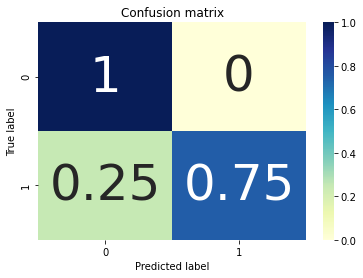

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0       Attribute set: ACC_Y_DR
1      Attribute set: ACC_Y_std
2      Attribute set: ACC_Y_var
3      Attribute set: GYRO_X_DR
4     Attribute set: GYRO_X_std
5     Attribute set: GYRO_X_var
6      Attribute set: ACC_Y_max
7      Attribute set: ACC_Z_var
8      Attribute set: ACC_Z_std
9     Attribute set: GYRO_X_max
10      Attribute set: ACC_Z_DR
Name: index, dtype: object
C parameter: 16.23776739188721

0
9


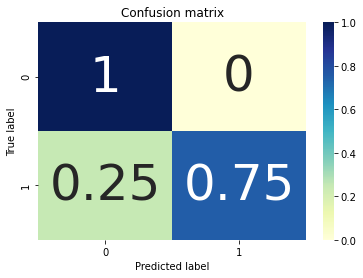

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0       Attribute set: ACC_Y_DR
1      Attribute set: ACC_Y_std
2      Attribute set: ACC_Y_var
3      Attribute set: GYRO_X_DR
4     Attribute set: GYRO_X_std
5     Attribute set: GYRO_X_var
6      Attribute set: ACC_Y_max
7      Attribute set: ACC_Z_var
8      Attribute set: ACC_Z_std
9     Attribute set: GYRO_X_max
10      Attribute set: ACC_Z_DR
Name: index, dtype: object
C parameter: 23.357214690901213

0
9


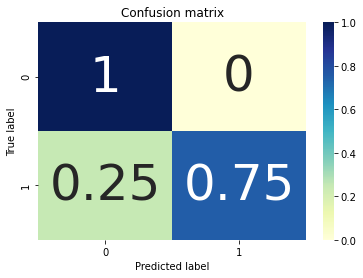

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0       Attribute set: ACC_Y_DR
1      Attribute set: ACC_Y_std
2      Attribute set: ACC_Y_var
3      Attribute set: GYRO_X_DR
4     Attribute set: GYRO_X_std
5     Attribute set: GYRO_X_var
6      Attribute set: ACC_Y_max
7      Attribute set: ACC_Z_var
8      Attribute set: ACC_Z_std
9     Attribute set: GYRO_X_max
10      Attribute set: ACC_Z_DR
Name: index, dtype: object
C parameter: 33.59818286283781

0
9


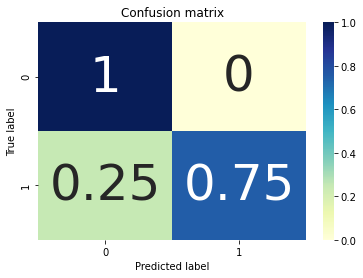

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0       Attribute set: ACC_Y_DR
1      Attribute set: ACC_Y_std
2      Attribute set: ACC_Y_var
3      Attribute set: GYRO_X_DR
4     Attribute set: GYRO_X_std
5     Attribute set: GYRO_X_var
6      Attribute set: ACC_Y_max
7      Attribute set: ACC_Z_var
8      Attribute set: ACC_Z_std
9     Attribute set: GYRO_X_max
10      Attribute set: ACC_Z_DR
Name: index, dtype: object
C parameter: 48.32930238571752

0
9


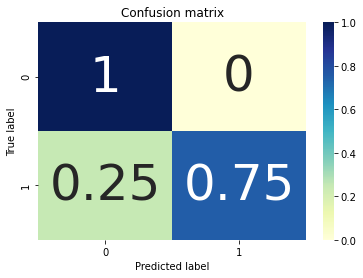

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0       Attribute set: ACC_Y_DR
1      Attribute set: ACC_Y_std
2      Attribute set: ACC_Y_var
3      Attribute set: GYRO_X_DR
4     Attribute set: GYRO_X_std
5     Attribute set: GYRO_X_var
6      Attribute set: ACC_Y_max
7      Attribute set: ACC_Z_var
8      Attribute set: ACC_Z_std
9     Attribute set: GYRO_X_max
10      Attribute set: ACC_Z_DR
Name: index, dtype: object
C parameter: 69.51927961775606

0
9


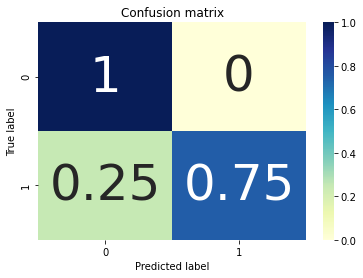

Dataset: df_sampled_four_sec
Train/Test Split: 0.9/0.1
0       Attribute set: ACC_Y_DR
1      Attribute set: ACC_Y_std
2      Attribute set: ACC_Y_var
3      Attribute set: GYRO_X_DR
4     Attribute set: GYRO_X_std
5     Attribute set: GYRO_X_var
6      Attribute set: ACC_Y_max
7      Attribute set: ACC_Z_var
8      Attribute set: ACC_Z_std
9     Attribute set: GYRO_X_max
10      Attribute set: ACC_Z_DR
Name: index, dtype: object
C parameter: 100.0

0
9


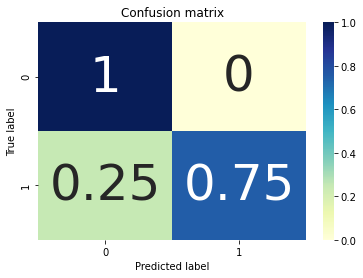

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\NGSI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-010206c2e336>", line 16, in <module>
    Classifier.fit(X_train, y_train)
  File "C:\Users\NGSI\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\NGSI\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\NGSI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, anoth

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\NGSI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-010206c2e336>", line 16, in <module>
    Classifier.fit(X_train, y_train)
  File "C:\Users\NGSI\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\NGSI\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\NGSI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, anoth

TypeError: object of type 'NoneType' has no len()

In [23]:
for attribute_set in df_sampled_three_sec_subsets:
    
    X = df_sampled_three_sec[attribute_set].values
    y = df_sampled_three_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        C_List_SVM = np.geomspace(0.1, 100, num=20)

        for c in C_List_SVM:
            
            Classifier = svm.SVC(kernel='linear',C=c)
            Classifier.fit(X_train, y_train)
        
            # predict - Predict class labels for samples in X
            y_pred = Classifier.predict(X_test)
            
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            if(TPR[1] > 0.74 and FPR[1] < 0.001):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("C parameter: {}".format(c))
                print("")
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
                plt.show()

## 4.2.4.df_sampled_four_sec

## 4.2.4.1.Before Hyper Parameter Tuning

In [ ]:
for attribute_set in df_sampled_four_sec_subsets:
    
    X = df_sampled_four_sec[attribute_set].values
    y = df_sampled_four_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        Classifier = svm.SVC(kernel='linear')
        Classifier.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        y_pred = Classifier.predict(X_test)
        
        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        if(TPR[1] > 0.5 and FPR[1] < 0.03):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
            plt.show()

## 4.2.4.2.After Hyper Parameter Tuning


In [ ]:
for attribute_set in df_sampled_four_sec_subsets:
    
    X = df_sampled_four_sec[attribute_set].values
    y = df_sampled_four_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        C_List_SVM = np.geomspace(0.1, 100, num=20)

        for c in C_List_SVM:
            
            Classifier = svm.SVC(kernel='linear', C=c)
            Classifier.fit(X_train, y_train)
        
            # predict - Predict class labels for samples in X
            y_pred = Classifier.predict(X_test)
            
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            if(TPR[1] > 0.5 and FPR[1]<0.03):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("C parameter: {}".format(c))
                print("")
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
                plt.show()

## 4.3.Random Forest

## 4.3.1.df_sampled_two_sec

## 4.3.1.1.Before Hyper Parameter Tuning

In [ ]:
for attribute_set in df_sampled_two_sec_subsets:
    
    X = df_sampled_two_sec[attribute_set].values
    y = df_sampled_two_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        rf = RandomForestClassifier(random_state=10)
        rf.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        
        y_pred = rf.predict(X_test)
        
        
        
        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
                
        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if(TPR[1] > 0.7 and FPR[1] < 0.011):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
            plt.show()
            

## 4.3.1.2.After Hyper Parameter Tuning

In [ ]:
for attribute_set in df_sampled_two_sec_subsets:
    
    X = df_sampled_two_sec[attribute_set].values
    y = df_sampled_two_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        n_estimators = [1,2,4,8,16,64,100,150,200]
        
        for n in n_estimators:
            rf = RandomForestClassifier(random_state=10, n_estimators=n)
            rf.fit(X_train, y_train)
        
            # predict - Predict class labels for samples in X
            y_pred = rf.predict(X_test)
        
            # Visualizing cm
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
                
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
        
            if(TPR[1] > 0.7 and FPR[1] < 0.011):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("n_estimators: {}".format(n))
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
                plt.show()
            

## 4.3.2.df_sampled_two_sec_sampled

## 4.3.2.1.Before Hyper Parameter Tuning

In [ ]:
for attribute_set in df_sampled_two_sec_sampled_subsets:
    
    X = df_sampled_two_sec_sampled[attribute_set].values
    y = df_sampled_two_sec_sampled['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        rf = RandomForestClassifier(random_state=10)
        rf.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        
        y_pred = rf.predict(X_test)
        
        
        
        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
                
        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if(TPR[1] > 0.5 and FPR[1] < 0.02):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
            plt.show()

## 4.3.2.2.After Hyper Parameter Tuning

In [ ]:
for attribute_set in df_sampled_two_sec_sampled_subsets:
    
    X = df_sampled_two_sec_sampled[attribute_set].values
    y = df_sampled_two_sec_sampled['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        n_estimators = [1,2,4,8,16,64,100,150,200]
        
        for n in n_estimators:
            rf = RandomForestClassifier(random_state=10, n_estimators=n)
            rf.fit(X_train, y_train)
        
            # predict - Predict class labels for samples in X
            y_pred = rf.predict(X_test)
        
            # Visualizing cm
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
                
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
        
            if(TPR[1] > 0.5 and FPR[1] < 0.02):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("n_estimators: {}".format(n))
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
                plt.show()

## 4.3.3.df_sampled_three_sec

## 4.3.3.1.Before Hyper Parameter Tuning

In [ ]:
for attribute_set in df_sampled_three_sec_subsets:
    
    X = df_sampled_three_sec[attribute_set].values
    y = df_sampled_three_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        rf = RandomForestClassifier(random_state=10)
        rf.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        
        y_pred = rf.predict(X_test)
        
        
        
        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
                
        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if(TPR[1] > 0.66 and FPR[1] < 0.018):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
            plt.show()

## 4.3.3.2.After Hyper Parameter Tuning

In [ ]:
for attribute_set in df_sampled_three_sec_subsets:
    
    X = df_sampled_three_sec[attribute_set].values
    y = df_sampled_three_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        n_estimators = [1,2,4,8,16,64,100,150,200]
        
        for n in n_estimators:
            rf = RandomForestClassifier(random_state=10, n_estimators=n)
            rf.fit(X_train, y_train)
        
            # predict - Predict class labels for samples in X
            y_pred = rf.predict(X_test)
        
            # Visualizing cm
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
                
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
        
            if(TPR[1] > 0.8 and FPR[1] < 0.001):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("n_estimators: {}".format(n))
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
                plt.show()

## 4.3.4.df_sampled_four_sec

## 4.3.4.1.Before Hyper Parameter Tuning

In [ ]:
for attribute_set in df_sampled_four_sec_subsets:
    
    X = df_sampled_four_sec[attribute_set].values
    y = df_sampled_four_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        
        rf = RandomForestClassifier(random_state=10)
        rf.fit(X_train, y_train)
        
        # predict - Predict class labels for samples in X
        
        y_pred = rf.predict(X_test)
        
        
        
        # Visualizing cm
        cm = confusion_matrix(y_test, y_pred)
        cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
                
        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        if(TPR[1] > 0.5 and FPR[1] < 0.02):
            print("Dataset: "+df.name) 
            print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
            print("Attribute set: "+attribute_set)
            print(FP[1])
            print(TP[1])
            plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
            plt.show()

## 4.3.4.2.After Hyper Parameter Tuning

In [ ]:
for attribute_set in df_sampled_four_sec_subsets:
    
    X = df_sampled_four_sec[attribute_set].values
    y = df_sampled_four_sec['Road_Anomaly_type']
    y = y.astype(int)
    
    for split in train_test_percentages:

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split[0], test_size=split[1], random_state=15)
        n_estimators = [1,2,4,8,16,64,100,150,200]
        
        for n in n_estimators:
            rf = RandomForestClassifier(random_state=10, n_estimators=n)
            rf.fit(X_train, y_train)
        
            # predict - Predict class labels for samples in X
            y_pred = rf.predict(X_test)
        
            # Visualizing cm
            cm = confusion_matrix(y_test, y_pred)
            cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
                
            FP = cm.sum(axis=0) - np.diag(cm)
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
        
            if(TPR[1] > 0.59 and FPR[1] < 0.036):
                print("Dataset: "+df.name) 
                print("Train/Test Split: "+str(split[0]) +"/"+str(split[1]))
                print("Attribute set: "+attribute_set)
                print("n_estimators: {}".format(n))
                print(FP[1])
                print(TP[1])
                plot_confusion_matrix(cm_norm, classes = Classifier.classes_, title='Confusion matrix')
                plt.show()